### Kaggle Link

https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train_df = pd.read_csv('../Data/Kaggle/toxic_train.csv')
test_df  = pd.read_csv('../Data/Kaggle/toxic_test.csv')

In [3]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0


### Pre-Processing

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [5]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemma = WordNetLemmatizer()

In [6]:
for df in [train_df, test_df]:
    df['comment_text'] = df['comment_text'].apply(lambda x: str(x).lower())
    df['comment_text'] = df['comment_text'].apply(lambda x: word_tokenize(x))
    df['comment_text'] = df['comment_text'].apply(lambda x: [lemma.lemmatize(word) for word in x])
#     df['comment_text'] = df['comment_text'].apply(lambda x: [stemmer.stem(word) for word in x])
    df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(x))

### Feature Engineering 

In [7]:
import re

for df in [train_df, test_df]:
    df['len'] = df['comment_text'].apply(lambda x: len(str(x)))
    df['number'] = df['comment_text'].apply(lambda x: len(re.sub(r'\D+', '', str(x))))
    df['non-word'] = df['comment_text'].apply(lambda x: len(re.sub(r'\w+', '', str(x))))

In [8]:
from sklearn.preprocessing import StandardScaler

to_scale = ['len', 'number', 'non-word']

scaler = StandardScaler()
train_df.loc[:, to_scale] = scaler.fit_transform(train_df[to_scale])
test_df.loc[:, to_scale]  = scaler.transform(test_df[to_scale])

In [9]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len,number,non-word
0,22256635,"nonsense ? kiss off , geek . what i said is tr...",1,0,0,0,0,0,-0.520296,-0.177135,-0.467268
1,27450690,"`` please do not vandalize page , a you did wi...",0,0,0,0,0,0,-0.433049,-0.177135,-0.364900
2,54037174,`` `` '' point of interest '' '' i removed the...,0,0,0,0,0,0,0.049280,-0.070170,0.178928
3,77493077,asking some his nationality is a racial offenc...,0,0,0,0,0,0,-0.418233,-0.177135,-0.422482
4,79357270,the reader here is not going by my say so for ...,0,0,0,0,0,0,-0.227277,-0.177135,-0.281726


### Exploratory Analysis

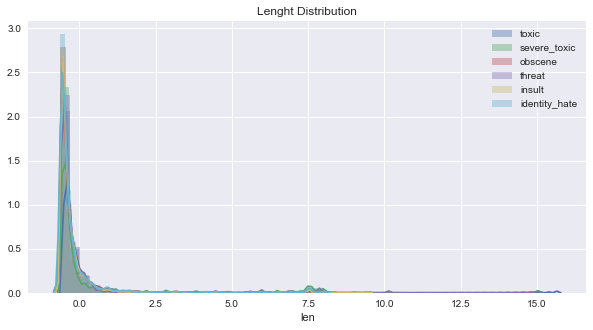

In [10]:
plt.figure(figsize=(10, 5))
s1 = train_df[train_df['toxic'] == 1]['len']
sns.distplot(s1, label='toxic')
s2 = train_df[train_df['severe_toxic'] == 1]['len']
sns.distplot(s2, label='severe_toxic')
s3 = train_df[train_df['obscene'] == 1]['len']
sns.distplot(s3, label='obscene')
s4 = train_df[train_df['threat'] == 1]['len']
sns.distplot(s4, label='threat')
s5 = train_df[train_df['insult'] == 1]['len']
sns.distplot(s5, label='insult')
s6 = train_df[train_df['identity_hate'] == 1]['len']
sns.distplot(s6, label='identity_hate')
plt.title('Lenght Distribution')
plt.legend()

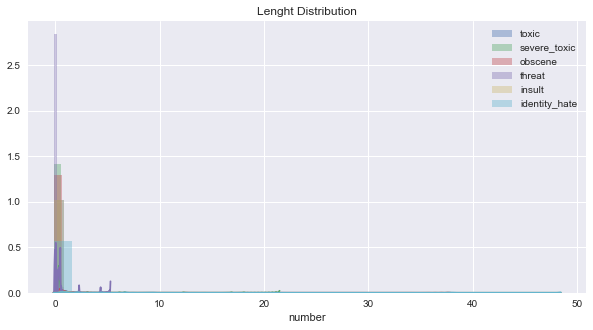

In [11]:
plt.figure(figsize=(10, 5))
s1 = train_df[train_df['toxic'] == 1]['number']
sns.distplot(s1, label='toxic')
s2 = train_df[train_df['severe_toxic'] == 1]['number']
sns.distplot(s2, label='severe_toxic')
s3 = train_df[train_df['obscene'] == 1]['number']
sns.distplot(s3, label='obscene')
s4 = train_df[train_df['threat'] == 1]['number']
sns.distplot(s4, label='threat')
s5 = train_df[train_df['insult'] == 1]['number']
sns.distplot(s5, label='insult')
s6 = train_df[train_df['identity_hate'] == 1]['number']
sns.distplot(s6, label='identity_hate')
plt.title('Lenght Distribution')
plt.legend()

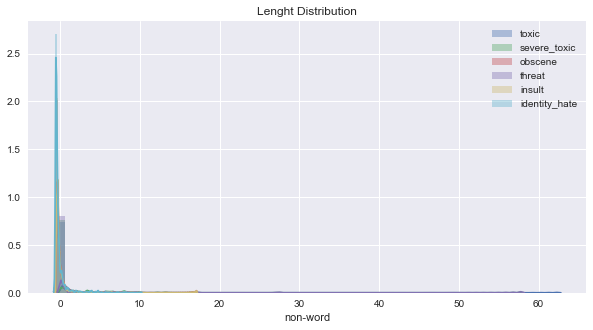

In [12]:
plt.figure(figsize=(10, 5))
s1 = train_df[train_df['toxic'] == 1]['non-word']
sns.distplot(s1, label='toxic')
s2 = train_df[train_df['severe_toxic'] == 1]['non-word']
sns.distplot(s2, label='severe_toxic')
s3 = train_df[train_df['obscene'] == 1]['non-word']
sns.distplot(s3, label='obscene')
s4 = train_df[train_df['threat'] == 1]['non-word']
sns.distplot(s4, label='threat')
s5 = train_df[train_df['insult'] == 1]['non-word']
sns.distplot(s5, label='insult')
s6 = train_df[train_df['identity_hate'] == 1]['non-word']
sns.distplot(s6, label='identity_hate')
plt.title('Lenght Distribution')
plt.legend()

### Modeling

In [13]:
classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

features = train_df.columns.difference(classes)
train_df["comment_text"].fillna(" ", inplace=True)
test_df["comment_text"].fillna(" ", inplace=True)

x_train = train_df[features].drop('id', axis=1)
x_test  = test_df[features].drop('id', axis=1)
y_train = train_df[classes]

In [14]:
x_train.head()

,comment_text,len,non-word,number
0,"nonsense ? kiss off , geek . what i said is tr...",-0.520296,-0.467268,-0.177135
1,"`` please do not vandalize page , a you did wi...",-0.433049,-0.364900,-0.177135
2,`` `` '' point of interest '' '' i removed the...,0.049280,0.178928,-0.070170
3,asking some his nationality is a racial offenc...,-0.418233,-0.422482,-0.177135
4,the reader here is not going by my say so for ...,-0.227277,-0.281726,-0.177135


In [15]:
y_train.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,1,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


#### TfidfVectorizer

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
vect_word = TfidfVectorizer(lowercase=True, analyzer='word', stop_words= 'english', ngram_range=(1,3), 
                            dtype=np.float32)
vect_char = TfidfVectorizer(lowercase=True, analyzer='char', stop_words= 'english', ngram_range=(1,3), 
                            dtype=np.float32)

X_train_vectorized_word = vect_word.fit_transform(x_train['comment_text'])
X_train_vectorized_char = vect_char.fit_transform(x_train['comment_text'])

X_test_vectorized_word = vect_word.transform(x_test['comment_text'])
X_test_vectorized_char = vect_char.transform(x_test['comment_text'])

In [18]:
print('Vocabulary len:', len(vect_word.get_feature_names()))
print('Longest word:', len(max(vect_word.vocabulary_, key=len)))

Vocabulary len: 4208624
Longest word: 4959


In [19]:
print('Vocabulary len:', len(vect_char.get_feature_names()))
print('Longest word:', len(max(vect_char.vocabulary_, key=len)))

Vocabulary len: 77744
Longest word: 3


In [20]:
def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [21]:
from scipy import sparse

In [22]:
X_train_vectorized = sparse.hstack([X_train_vectorized_word, X_train_vectorized_char])
X_test_vectorized  = sparse.hstack([X_test_vectorized_word, X_test_vectorized_char])

In [23]:
X_train_vectorized.shape

(95851, 4286368)

In [24]:
X_train_vectorized = add_feature(X_train_vectorized, x_train['len'])
X_train_vectorized = add_feature(X_train_vectorized, x_train['non-word'])
X_train_vectorized = add_feature(X_train_vectorized, x_train['number'])

In [25]:
X_train_vectorized.shape

(95851, 4286371)

In [26]:
X_test_vectorized = add_feature(X_test_vectorized, x_test['len'])
X_test_vectorized = add_feature(X_test_vectorized, x_test['non-word'])
X_test_vectorized = add_feature(X_test_vectorized, x_test['number'])

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
from sklearn.metrics import log_loss

In [29]:
y_pred = np.zeros((test_df.shape[0], len(classes)))

loss = []
for i, j in enumerate(classes):
    model = LogisticRegression(C=4)
    model.fit(X_train_vectorized, y_train[j])
    y_pred[:,i] = model.predict_proba(X_test_vectorized)[:,1]
    y_check = model.predict_proba(X_train_vectorized)[:,1]
    loss.append(log_loss(y_train[j], y_check))
    
np.mean(loss)

0.03196907107333153

In [30]:
y_df = pd.DataFrame(y_pred, columns=classes)
submission = pd.concat([test_df['id'], y_df], axis=1)
submission.to_csv('tfidf.csv', index=False)

**Log**

- TFIDF in word and character level: 0.049
- Adding min_df: 0.049
- Adding stemmer: 0.049
- Stemmer and no min_df: 0.049
- Adding features: 0.052

#### LSTM

In [31]:
from keras.models import Model
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.preprocessing import text, sequence
from keras.callbacks import EarlyStopping, Callback
from keras.layers.normalization import BatchNormalization
import keras.backend as K

Using TensorFlow backend.


In [32]:
from IPython.display import clear_output

class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        plt.plot(self.x, self.losses, label='loss')
        plt.plot(self.x, self.val_losses, label='val_loss')
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [33]:
x_train['comment_text'].str.len().mean()

403.06370303909193

In [34]:
x_test['comment_text'].str.len().mean()

490.2132177376012

In [35]:
max_features = 20000
maxlen = 256

In [36]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x_train['comment_text']))

X_train = tokenizer.texts_to_sequences(x_train['comment_text'])
X_test  = tokenizer.texts_to_sequences(x_test['comment_text'])
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test  = sequence.pad_sequences(X_test,  maxlen=maxlen)

In [37]:
def get_model():
    embed_size = 128
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size)(inp)
    x = Bidirectional(LSTM(50, return_sequences=True))(x)
    x = GlobalMaxPool1D()(x)
    x = Dropout(0.3)(x)
    x = Dense(50, activation="relu")(x)
    x = Dropout(0.3)(x)
    x = Dense(6, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

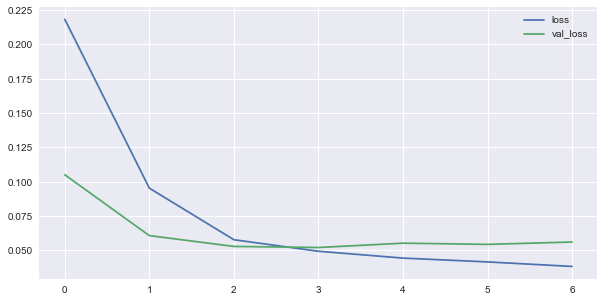

67095/67095 [==============================] - 1003s - loss: 0.0381 - acc: 0.9856 - val_loss: 0.0559 - val_acc: 0.9811


In [38]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
BATCH_SIZE = 512
epochs = 20

model = get_model()
model.fit(X_train, y_train.values, epochs=epochs, batch_size=BATCH_SIZE, validation_split=0.3, 
          verbose=1, callbacks=[plot_losses, early_stopping])

In [39]:
y_pred = model.predict(X_test)

In [40]:
y_df = pd.DataFrame(y_pred, columns=classes)
submission = pd.concat([test_df['id'], y_df], axis=1)
submission.to_csv('lstm.csv', index=False)